# Deep Learning
# Home work 4 by Ehsan Kouchaki

<div dir="rtl">
    
# این تکلیف با استفاده از پایتورچ انجام شده است. کتابخانه های لازم بر این اساس در زیر اضافه شده است
  

In [1]:
import torch 
import torch.nn as nn
from torch.autograd import Variable

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler

<div dir="rtl">
    
# به دلیل اشکال در اجرای fastquant داده های مورد نیاز مربوط به بازه زمانی از یک سال قبل نخست ذخیره شد و سپس در این قسمت بارگیری و نمایش داده شده است
  

DatetimeIndex(['2018-09-09', '2018-09-10', '2018-09-11', '2018-09-12',
               '2018-09-13', '2018-09-14', '2018-09-15', '2018-09-16',
               '2018-09-17', '2018-09-18',
               ...
               '2021-05-26', '2021-05-27', '2021-05-28', '2021-05-29',
               '2021-05-30', '2021-05-31', '2021-06-01', '2021-06-02',
               '2021-06-03', '2021-06-04'],
              dtype='datetime64[ns]', name='dt', length=1000, freq=None) 



,open,high,low,close,volume
dt,,,,,
2018-09-09,196.87,208.60,185.02,195.81,429255.02592
2018-09-10,196.13,203.42,187.10,197.15,418489.86663
2018-09-11,197.22,200.20,176.16,185.18,476745.79216
2018-09-12,185.14,185.22,167.32,183.12,504047.79165
2018-09-13,183.17,215.00,183.15,210.68,739503.34051


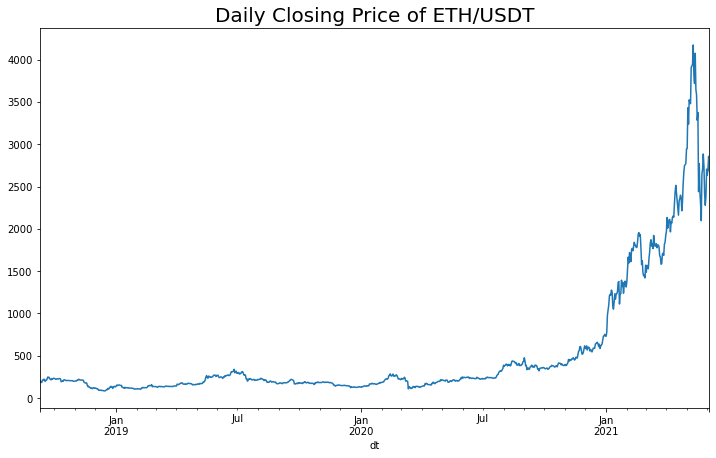

In [2]:
crypto = pd.read_pickle("crypto.plk")
print(crypto.index, "\n")
crypto.close.plot(figsize=(12, 7))
plt.title("Daily Closing Price of ETH/USDT", fontsize=20)
crypto.head()

<div dir="rtl">
    
# در این بخش فقط ستون های مورد نیاز یعنی ستون قیمت نهایی حفظ شده است
  

In [3]:
crypto = crypto.drop(['open','high','low','volume'], axis = 1) 
crypto.head()

,close
dt,
2018-09-09,195.81
2018-09-10,197.15
2018-09-11,185.18
2018-09-12,183.12
2018-09-13,210.68


<div dir="rtl">
    
# در این بخش داده ها به دو بخش آموزش و تست تقسیم شده است. برای این کار تعداد 100 نمونه مربوط به 100 روز آخر به عنوان داده های تست انتخاب شدند
  

In [4]:
test_days = 100
train_data = crypto[:len(crypto)-test_days]
test_data= crypto[len(crypto)-test_days:]
print("train_data shape is : ", train_data.shape)
print("test_data shape is : ", test_data.shape)

train_data shape is :  (900, 1)
test_data shape is :  (100, 1)


<div dir="rtl">
    
# در این بخش داده ها با استفاده از روش MinMax نرمال سازی شده است
  

In [5]:
transformer= MinMaxScaler().fit(train_data)
scaler = MinMaxScaler()
train_set = scaler.fit_transform(train_data)
test_set = scaler.fit_transform(test_data)
data_set = np.concatenate((train_set,test_set))
print("train set with shape ",train_set.shape, " is : \n",train_set[0:10])
print()
print("test set with shape ",test_set.shape, " is : \n",test_set[0:10])

train set with shape  (900, 1)  is : 
 [[0.05988008]
 [0.06059618]
 [0.05419935]
 [0.05309848]
 [0.06782668]
 [0.06683269]
 [0.07349672]
 [0.07289819]
 [0.06006712]
 [0.06648533]]

test set with shape  (100, 1)  is : 
 [[0.02271745]
 [0.00922568]
 [0.01414168]
 [0.        ]
 [0.05470778]
 [0.02454371]
 [0.05391991]
 [0.04358687]
 [0.03962211]
 [0.0839315 ]]


<div dir="rtl">
   
# در این بخش از دل نمونه های آموزش و تست مقادیر داده و برچسب جداسازی شده است. همچنین داده ها به فرم تورچ تنسور تبدیل شده است. در انجام این کار از سایز پنجره به اندازه 7 استفاده شده که این اندازه با سعی و خطا به دست آمده است 
  

In [6]:
x_train=[]; y_train=[];
x_test=[];  y_test=[];
lbw = 7 # lookback window

for i in range(len(train_set)-lbw):
    x_train.append(train_set[i:(i+lbw)])
    y_train.append(train_set[i+lbw])
for i in range(len(test_set)-lbw):
    x_test.append(test_set[i:(i+lbw)])
    y_test.append(test_set[i+lbw])

x_train=torch.from_numpy(np.array(x_train).squeeze().astype(np.float32))
y_train=torch.from_numpy(np.array(y_train).astype(np.float32))
x_test=torch.from_numpy(np.array(x_test).squeeze().astype(np.float32))
y_test=torch.from_numpy(np.array(y_test).astype(np.float32))

print("x_train shape is : ", x_train.shape, " and ", "y_train shape is : ", y_train.shape)
print("x_test  shape is : ", x_test.shape, "  and ", "y_test  shape is : ", y_test.shape)

x_train shape is :  torch.Size([893, 7])  and  y_train shape is :  torch.Size([893, 1])
x_test  shape is :  torch.Size([93, 7])   and  y_test  shape is :  torch.Size([93, 1])


<div dir="rtl">
   
# در این بخش مدل شبکه عصبی بازگشتی طراحی شده است.
    در طراحی این شبکه که یک شبکه عصبی بازگشتی GRU است، از یک لایه GRU با اندازه ورودی 7 یعنی برابر با سایز پنجره و تعداد 8 نرون داخل لایه مخفی استفاده شده است
    

     همچنین در ادامه از دو لایه دنس استفاده شده است. این لایه ها به ترتیب دارای 5 و 1 نرون هستند که مربوط به لایه خروجی است.

In [7]:
class MyModel_GRU(torch.nn.Module):
    def __init__(self):
        super(MyModel_GRU, self).__init__()
        self.rnn = nn.GRU(input_size=7, hidden_size=12, num_layers=1)
        self.dense1 = nn.Linear(12, 5)
        self.dense2 = nn.Linear(5, 1)

    def forward(self, x, hidden):
        x_batch = x.view(len(x), 1, -1)
        x, hidden = self.rnn(x_batch, hidden)
        x = self.dense1(x)
        x = self.dense2(x)
        return x, hidden

    def init_hidden(self):
        return Variable(torch.randn(1, 1, 12))

<div dir="rtl">
   
# در این بخش یک شی با نام model از کلاس تعریف شده در بالا ساخته شده و از معیار MAE برای محاسبه خطا استفاده شده است. همچنین از بهینه ساز Adam در این قسمت استفاده شده است. مقدار نرخ یادگیری برابر با 0.02 در نظر گرفته شده که این مقدار با استفاده از سعی و خطا به دست آمده است. در پایان پارامترهای مدل چاپ شده است 

In [8]:
model = MyModel_GRU()
lossfunc = nn.L1Loss()  # This is MAE in Pytorch
optimizer = torch.optim.Adam(model.parameters(), lr=0.02)
initial_hidden = model.init_hidden()
print(model)

MyModel_GRU(
  (rnn): GRU(7, 12)
  (dense1): Linear(in_features=12, out_features=5, bias=True)
  (dense2): Linear(in_features=5, out_features=1, bias=True)
)


<div dir="rtl">
   
# در این بخش کار آموزش مدل انجام شده است. این کار در 300 ایپاک انجام شده است. همان گونه که مشاهده می شود در روند انجام آموزش مقدار لاس روند نزولی خود را به خوبی طی کرده است

In [9]:
Epoc = 300
for epoc in range(Epoc):
    model.zero_grad()
    hidden=initial_hidden
    out, hidden = model(x_train, hidden)
    loss = lossfunc(out.view(-1,1), y_train)
    if epoc % 10 == 0:
        print('epoch {} loss: {}'.format(epoc, loss.data.numpy().tolist()), flush=True)
    loss.backward()
    optimizer.step()

epoch 0 loss: 0.15887479484081268
epoch 10 loss: 0.03941924124956131
epoch 20 loss: 0.01623600907623768
epoch 30 loss: 0.017293091863393784
epoch 40 loss: 0.011378668248653412
epoch 50 loss: 0.009755134582519531
epoch 60 loss: 0.008910111151635647
epoch 70 loss: 0.008474246598780155
epoch 80 loss: 0.007954186759889126
epoch 90 loss: 0.00868481770157814
epoch 100 loss: 0.007913419976830482
epoch 110 loss: 0.006929527968168259
epoch 120 loss: 0.00893465243279934
epoch 130 loss: 0.007717922795563936
epoch 140 loss: 0.006492504384368658
epoch 150 loss: 0.008530082181096077
epoch 160 loss: 0.007592609152197838
epoch 170 loss: 0.006262855138629675
epoch 180 loss: 0.008264284580945969
epoch 190 loss: 0.006620476022362709
epoch 200 loss: 0.0061860475689172745
epoch 210 loss: 0.008106011897325516
epoch 220 loss: 0.007092773914337158
epoch 230 loss: 0.0060324035584926605
epoch 240 loss: 0.007342347409576178
epoch 250 loss: 0.006303523667156696
epoch 260 loss: 0.007043873891234398
epoch 270 loss:

<div dir="rtl">
   
# در این بخش داده های آموزشی به مدل یادگرفته شده داده شده اند و نمودار تغییرات واقعی به رنگ قرمز و نمودار پیش بینی شده به رنگ آبی در یک پلات رسم شده اند. در این بلوک همچنین مقدار خطای MAE با استفاده از تعریف ریاضی آن بر اساس بردار مقادیر واقعی و بردار مقادیر پیش بینی شده و اختلاف آن دو با هم محاسبه شده است. همان گونه که از نتایج مشخص است دو منحنی تقریبا بر یکدیگر منطبق شده اند و مقدار خطا در حدود 0.0065 به دست آمده که میزان قابل قبولی است. نتیجه به دست آمده نشان دهنده دقت بالای مدل طراحی شده است

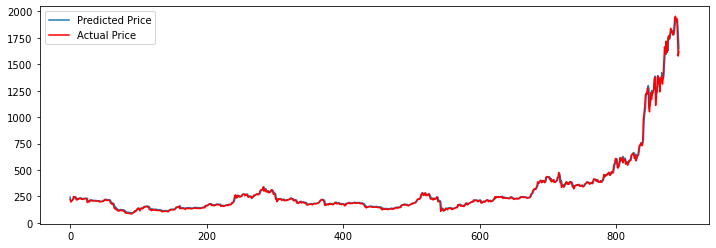

The MAE error in train is:  0.0065706168684153115


In [15]:
pred, _ = model(x_train, initial_hidden)

price_train = transformer.inverse_transform(pred.detach().numpy().reshape(-1,1))
actual_train = transformer.inverse_transform(y_train.numpy().reshape(-1,1))

error = np.abs(pred.detach().numpy().reshape(-1,1)
               - y_train.detach().numpy().reshape(-1,1)).sum()
mae = error/x_train.shape[0]

plt.figure(figsize=(12,4))
plt.plot(price_train, label='Predicted Price')
plt.plot(actual_train, 'r', label='Actual Price')
plt.legend()
plt.show()
print("The MAE error in train is: ", mae)

<div dir="rtl">
   
# در این بخش این بار داده های تست به مدل  داده شده اند. همان گونه که از نتایج مشخص است دو منحنی تقریبا بر یکدیگر منطبق شده اند و مقدار خطا  0.045 به دست آمده که میزان قابل قبولی برای نمونه های تست است. نتیجه به دست آمده نشان می دهد دقت مدل روی داده های تست نیز قابل قبول است

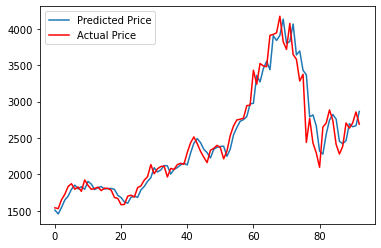

The MAE error in test is:  0.04550776943083732


In [16]:
pred, _ = model(x_test, initial_hidden)

price_test=scaler.inverse_transform(pred.detach().numpy().reshape(-1,1))
actual_test=scaler.inverse_transform(y_test)

error = np.abs(pred.detach().numpy().reshape(-1,1)
               - y_test.detach().numpy().reshape(-1,1)).sum()
mae = error/x_test.shape[0]

plt.plot(price_test, label='Predicted Price')
plt.plot(actual_test, 'r', label='Actual Price')
plt.legend()
plt.show()
print("The MAE error in test is: ", mae)

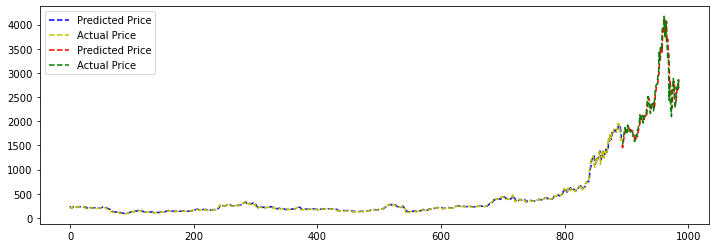

In [39]:
plt.figure(figsize=(12,4))
plt.plot(price_train, 'b--', label='Predicted Price')
plt.plot(actual_train, 'y--', label='Actual Price')
plt.legend()
plt.plot(range(900- lbw , 1000- 2*lbw ), price_test, 'r--', label='Predicted Price')
plt.plot(range(900- lbw , 1000- 2*lbw ), actual_test, 'g--', label='Actual Price')
plt.legend()
plt.show()